In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
plt.style.use('default')
sns.set(style='darkgrid')
pd.set_option('display.max_rows',200)

In [6]:
df=pd.read_csv('C:/Users/kusha/Downloads/data_cleaned.csv')

In [7]:
df

,tPos_+ve_0.100000,tPos_+ve_0.200000,tPos_+ve_0.300000,tPos_+ve_0.400000,tPos_+ve_0.500000,tPos_+ve_0.600000,tPos_+ve_0.700000,tPos_+ve_0.800000,tPos_+ve_0.900000,tPos_+ve_0.910000,...,rpm_d1_+ve_0.920000,rpm_d1_+ve_0.930000,rpm_d1_+ve_0.940000,rpm_d1_+ve_0.950000,rpm_d1_+ve_0.960000,rpm_d1_+ve_0.970000,rpm_d1_+ve_0.980000,rpm_d1_+ve_0.990000,rpm_d1_-ve_std,rpm_d1_+ve_std
0,12.549020,13.725490,13.725490,14.117647,14.901961,16.078431,18.039216,20.392157,25.098039,25.776471,...,1215.89,1341.335,1482.620,1619.3875,1714.49,1831.0975,1962.19,2122.5575,577.335201,604.131676
1,12.941176,13.882353,14.509804,14.509804,14.901961,15.294118,16.078431,17.254902,19.725490,20.392157,...,646.27,833.320,887.480,988.4500,1115.74,1294.2200,1428.32,1474.1500,345.724384,326.814550
2,12.941176,14.117647,14.509804,15.294118,15.686275,17.254902,19.215686,21.960784,25.882353,26.666667,...,261.09,283.115,304.585,350.2875,403.51,498.0500,784.37,945.7900,180.690215,170.659882
3,12.549020,13.333333,13.725490,14.117647,14.117647,14.509804,15.686275,18.039216,21.215686,21.568627,...,279.71,303.500,333.230,372.6000,430.55,519.2500,651.86,881.0400,179.369146,170.978184
4,13.725490,14.117647,14.509804,15.529412,16.862745,18.431373,19.607843,20.784314,23.137255,23.529412,...,198.96,218.750,242.440,266.3500,304.45,357.0250,417.35,663.3900,165.112781,136.704562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,4.117647,6.352941,11.058824,16.470588,16.862745,25.882353,31.372549,42.196078,45.098039,45.141176,...,189.88,197.760,213.160,246.6000,262.94,288.6600,339.56,403.7200,99.496426,85.719797
481,2.352941,7.058824,10.980392,14.509804,19.019608,24.313725,31.372549,39.058824,51.764706,52.996078,...,279.96,289.000,300.920,320.6250,335.32,360.2300,385.90,433.3000,148.703842,105.512974
482,1.960784,4.000000,7.450980,10.196078,13.137255,14.509804,18.823529,23.921569,30.549020,33.592157,...,160.28,171.780,187.330,203.8000,245.20,283.1400,349.32,412.0200,116.389510,90.273639
483,2.784314,6.745098,10.980392,13.725490,17.647059,21.960784,25.882353,33.647059,43.882353,45.490196,...,238.54,251.160,266.120,284.0000,323.63,352.3200,408.84,510.6600,144.560546,108.145850


In [22]:
pca=PCA(n_components=2)
X_pca=df.values
X_pca=StandardScaler().fit_transform(X_pca)
components=pca.fit_transform(X_pca)
explained_variance_ratio=100*sum(pca.explained_variance_ratio_)
# df_pca=pd.DataFrame(data=components,columns=['Principal Component 1','Principal Component 2'])


In [23]:
X_pca

array([[ 0.91300173,  0.65770282,  0.33027293, ...,  3.29366953,
         0.37989867,  0.5381009 ],
       [ 0.98918076,  0.68859883,  0.48696882, ...,  1.59910874,
        -0.31076096, -0.28767543],
       [ 0.98918076,  0.73494285,  0.48696882, ...,  0.21828243,
        -0.80289011, -0.75266232],
       ...,
       [-1.14383204, -1.25784988, -0.92329417, ..., -1.17668249,
        -0.99463375, -0.99203107],
       [-0.98385608, -0.71716968, -0.21816268, ..., -0.91889479,
        -0.91062819, -0.9388124 ],
       [-1.06765301, -0.96433777, -0.68825034, ..., -1.23733342,
        -0.93721016, -1.00089263]])

In [24]:
components.shape

(485, 2)

In [25]:
explained_variance_ratio

49.937480977109985

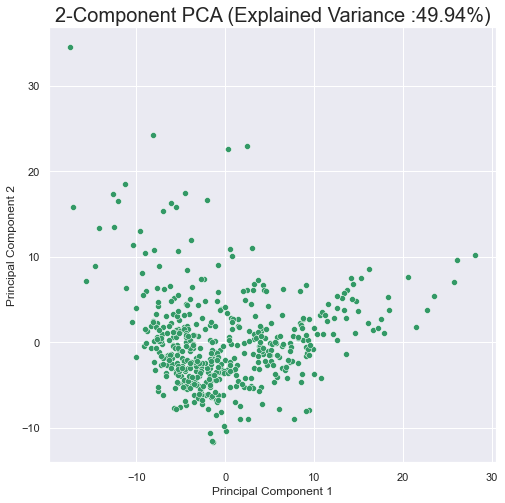

In [27]:
df_pca=pd.DataFrame(data=components,columns=['Principal Component 1','Principal Component 2'])
fig,ax=plt.subplots(figsize=(8,8))
sns.scatterplot(ax=ax,data=df_pca,x='Principal Component 1',y='Principal Component 2',color='#339966')
ax.set_title('2-Component PCA (Explained Variance :{:.2f}%)'.format(explained_variance_ratio),size=20)
plt.show() 

In [31]:
pca_table={ 'Num. Components':[] , 'Explained Var':[] }

for k in range(1,81):
    pca=PCA(n_components=k)
    X_pca=df.values
    X_pca=StandardScaler().fit_transform(X_pca)
    components=pca.fit_transform(X_pca)
    explained_variance=sum(pca.explained_variance_ratio_)
    pca_table['Num. Components'].append(k)
    pca_table['Explained Var'].append(explained_variance)

df_pca_table=pd.DataFrame(pca_table)
df_pca_table    



,Num. Components,Explained Var
0,1,0.310502
1,2,0.499375
2,3,0.629588
3,4,0.721923
4,5,0.754057
...,...,...
75,76,0.997008
76,77,0.997132
77,78,0.997253
78,79,0.997367


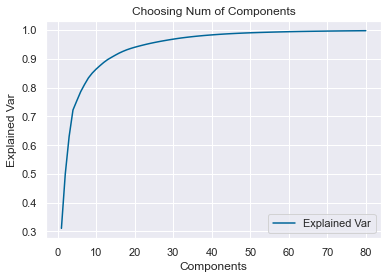

In [35]:
df_pca_table.plot(x='Num. Components', y='Explained Var',
                 color='#006699')
plt.title("Choosing Num of Components")
plt.xlabel('Components')
plt.ylabel('Explained Var')
plt.show()

In [36]:
#choosing n=50 to achieve 99% retention rate
pca=PCA(n_components=50)
X_pca=df.values
X_pca=StandardScaler().fit_transform(X_pca)
X=pca.fit_transform(X_pca)

In [39]:
wcss=[]
silhouette_coefficients=[]
min_cluster=2
max_cluster=30

for k in range(min_cluster,max_cluster+1):
    kmeans=KMeans(n_clusters=k,init='k-means++',max_iter=500,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    sil_score=silhouette_score(X,kmeans.labels_)
    silhouette_coefficients.append(sil_score)

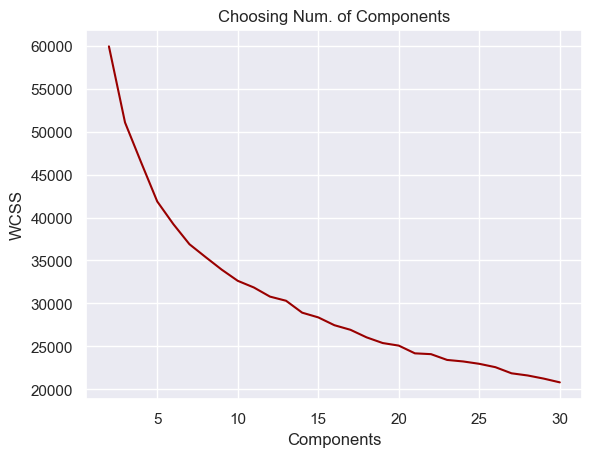

In [43]:
plt.plot(range(min_cluster, max_cluster+1),wcss,color='#990000')
plt.title('Choosing Num. of Components')
plt.xlabel('Components')
plt.ylabel('WCSS')
plt.show()

In [44]:
knee_loc = KneeLocator(range(min_cluster, max_cluster+1), wcss,
                      curve='convex', direction='decreasing')

In [45]:
knee_loc.elbow

9

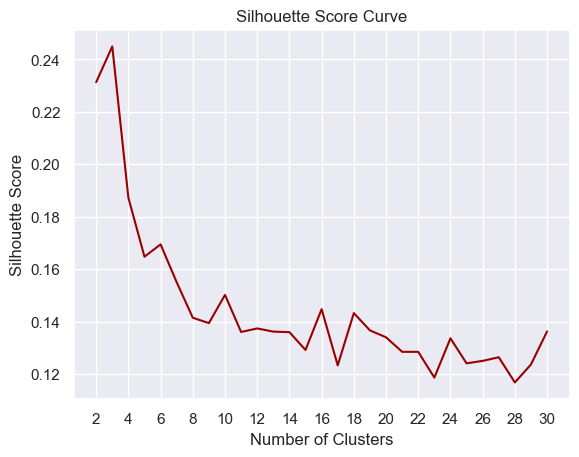

In [46]:
plt.plot(range(min_cluster, max_cluster+1), silhouette_coefficients,
        color='#990000')
plt.xticks(range(min_cluster, max_cluster+1, 2))
plt.title('Silhouette Score Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [47]:
# we get 3 clusters

In [48]:
# we will be choosing 3 clusters to asisgn them to trip id

In [52]:
type(X)


numpy.ndarray

In [53]:
df = pd.DataFrame(X)

In [54]:
df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-17.484188,34.502579,5.651562,-12.128354,7.277889,8.274255,11.160273,3.282015,-3.890480,-6.150049,...,0.012711,-1.091530,0.303448,-0.340654,-0.501655,0.340938,-0.301837,0.592801,-0.544262,0.482611
1,-8.091395,24.235218,5.400567,6.241742,10.547307,4.869358,9.444853,2.804284,-0.641733,-6.252689,...,-0.563290,1.207774,-0.165210,0.344443,0.724451,-0.577037,0.479782,0.207822,0.553551,-0.056467
2,-3.334420,-1.881805,-1.891018,-1.296074,0.671151,-1.186532,0.138807,-1.599852,0.483744,-1.172497,...,0.090817,-0.196790,-0.133027,0.072133,-0.039808,-0.199244,0.176014,0.198996,0.412543,-0.019275
3,-3.732661,-4.085275,1.414378,2.223104,0.469345,1.213879,1.285689,-2.024423,-0.509719,0.082521,...,0.073194,-0.134367,0.241983,-0.121498,-0.186909,-0.285481,0.065651,0.155496,0.011275,0.156066
4,-2.719127,-5.526342,6.106128,1.957654,1.420554,0.431783,0.705153,0.550178,-1.291085,1.622340,...,-0.066713,0.003539,0.123953,-0.002806,0.080436,-0.463317,-0.575492,-0.329149,-0.160326,-0.090135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,16.026855,2.247207,0.000767,0.524128,5.038629,6.224864,-3.950621,-3.271195,1.050842,-2.043046,...,-1.141944,-0.987766,-0.841270,-0.029389,0.133287,-0.036990,0.277969,0.295161,-0.431872,-0.405293
481,16.179445,8.564248,-6.382514,-4.423908,3.570411,3.374934,-2.453626,-2.546953,1.307224,2.277789,...,-0.569383,-0.370614,-0.417628,-0.029878,-0.003736,0.223581,0.184812,-0.197320,0.128704,-0.044282
482,9.529834,-0.352597,-4.670053,4.140172,1.464306,1.172245,0.179873,-0.014480,0.616715,0.298728,...,-0.655097,0.233751,-0.399415,-0.402587,-0.191872,-0.041993,0.128317,0.020071,0.416038,0.246514
483,14.199353,5.007834,-5.383866,-1.649940,2.700636,1.364314,-2.156486,-2.199037,0.666685,1.359524,...,0.497813,-0.563340,-0.273630,-0.206030,-0.257037,0.077174,-0.161384,0.051041,-0.274863,-0.260236


In [61]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=500, n_init=10, random_state=0)
clusters=kmeans.fit_predict(X)

In [62]:
cluster_labels=kmeans.labels_

In [66]:
cluster_labels
centroids = kmeans.cluster_centers_
centroids.shape


(3, 50)

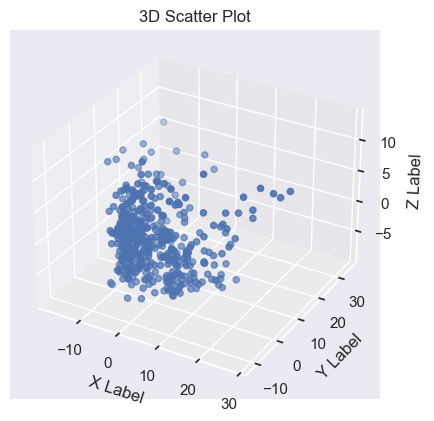

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importing 3D plotting functionality


# Extracting the first three dimensions for plotting
x = X[:, 0]
y = X[:, 1]
z = X[:, 2]

# Create a figure and a 3D Axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Creating the scatter plot
ax.scatter(x, y, z)

# Setting labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot')

# Show the plot
plt.show()

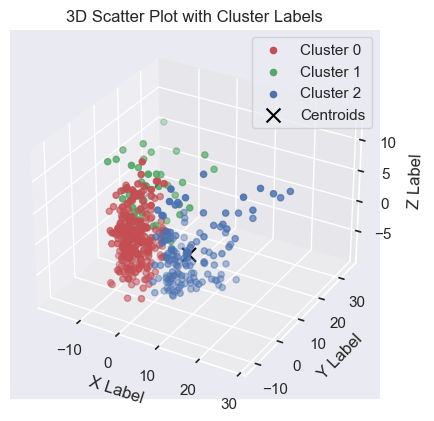

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importing 3D plotting functionality
from sklearn.cluster import KMeans

# Generate sample data
data = X

# Perform KMeans clustering
n_clusters = 3  
kmeans = KMeans(n_clusters=n_clusters)
cluster_labels = kmeans.fit_predict(data)
centroids = kmeans.cluster_centers_

# Extracting the first three dimensions for plotting
x = data[:, 0]
y = data[:, 1]
z = data[:, 2]

# Create a figure and a 3D Axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a colormap for clusters
colors = ['r', 'g', 'b', 'c', 'm']  # Add more colors if you have more clusters

# Plot each point with its cluster color and label
for i in range(n_clusters):
    ax.scatter(x[cluster_labels == i], y[cluster_labels == i], z[cluster_labels == i], c=colors[i], label=f'Cluster {i}')

# Plot cluster centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='black', marker='x', s=100, label='Centroids')

# Set labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot with Cluster Labels')

# Add legend
ax.legend()

# Show the plot
plt.show()